# Este es un EDA adicional para el proyecto individual 2 de Henry - Data Analytics

MOOCs : Massive Open Online Courses

Alumno: Fernando Embrioni

Junio 2023

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np

# Análisis de los dataset Coursera_courses.csv y Coursera_reviews.csv

In [2]:
coursera_courses_df = pd.read_csv('../data/Coursera_courses.csv')

In [3]:
coursera_courses_df.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [4]:
coursera_courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


- No Hay nulos. Procedo con los descartes de registros y la actualizacion del tipo de datos en las columnas que haga falta

In [5]:
# Elimino duplicados (Registro completo)
coursera_courses_df.drop_duplicates(inplace=True)

In [6]:
coursera_courses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 24.3+ KB


No había duplicados.

## Procedo a examinar las reviews

In [7]:
coursera_reviews_df = pd.read_csv('../data/Coursera_reviews.csv')

In [8]:
coursera_reviews_df.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [9]:
coursera_reviews_df['rating'].value_counts()

5    1146164
4     226702
3      48303
1      17354
2      16188
Name: rating, dtype: int64

Los reviews de rating 1 son malos, mientras que los de rating 5 son buenos. Dado que del total de ratings (519947), más del 80% se corresponde con ratings positivos (ratings 4 y 5), podemos asumir que es mejor tener muchos ratings.

In [10]:
coursera_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


Hay nulos en reviews, pero el rating no tiene nulos y ya tiene el tipo de datos correcto.

- Procedo con los descartes de registros y la actualizacion del tipo de datos en las columnas que haga falta.

In [11]:
# Elimino duplicados (Registro completo). Asumiendo que los reviewers son únicos
coursera_reviews_df.drop_duplicates(inplace=True)

In [12]:
# Cambio el formato de la fecha
coursera_reviews_df['date_reviews'] = coursera_reviews_df['date_reviews'].astype('datetime64[ns]')

In [13]:
coursera_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519947 entries, 0 to 1454644
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   reviews       519891 non-null  object        
 1   reviewers     519947 non-null  object        
 2   date_reviews  519947 non-null  datetime64[ns]
 3   rating        519947 non-null  int64         
 4   course_id     519947 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 23.8+ MB


Existían muchos reviews duplicados.

## Procedo a joinear los datasets. Cada registro contendrá un rating asignado a cada curso

In [14]:
coursera_courses_df['course_id'] = coursera_courses_df['course_id'].astype('str')
coursera_reviews_df['course_id'] = coursera_reviews_df['course_id'].astype('str')
coursera_df = pd.merge(coursera_courses_df, coursera_reviews_df, how='inner', on='course_id')
del coursera_courses_df
del coursera_reviews_df

In [15]:
coursera_df.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1


## Agrupo la info por curso

In [16]:
coursera_grouped_df = coursera_df.groupby(['course_id', 'name', 'institution', 'course_url',\
                                           'date_reviews','rating'])\
                                            .aggregate({'reviews' : 'count'})
coursera_grouped_df.reset_index(inplace=True)

In [17]:
# Preparo campos de fecha
coursera_grouped_df['review_year'] = coursera_grouped_df['date_reviews'].dt.year
coursera_grouped_df['review_month'] = coursera_grouped_df['date_reviews'].dt.month
coursera_grouped_df['review_yyyymm'] = coursera_grouped_df['review_year'].astype(str) + '-' + ('0' + coursera_grouped_df['review_month'].astype(str)).str[-2:]

In [18]:
coursera_grouped_df.head()

,course_id,name,institution,course_url,date_reviews,rating,reviews,review_year,review_month,review_yyyymm
0,aboriginal-education,Aboriginal Worldviews and Education,University of Toronto,https://www.coursera.org/learn/aboriginal-educ...,2017-03-22,5,1,2017,3,2017-03
1,aboriginal-education,Aboriginal Worldviews and Education,University of Toronto,https://www.coursera.org/learn/aboriginal-educ...,2017-04-07,5,2,2017,4,2017-04
2,aboriginal-education,Aboriginal Worldviews and Education,University of Toronto,https://www.coursera.org/learn/aboriginal-educ...,2017-04-10,5,1,2017,4,2017-04
3,aboriginal-education,Aboriginal Worldviews and Education,University of Toronto,https://www.coursera.org/learn/aboriginal-educ...,2017-04-12,4,1,2017,4,2017-04
4,aboriginal-education,Aboriginal Worldviews and Education,University of Toronto,https://www.coursera.org/learn/aboriginal-educ...,2017-04-12,5,1,2017,4,2017-04


### Veo cómo se distribuye en el tiempo el promedio de reviews por nivel de rating

In [19]:
coursera_grouped_df = coursera_grouped_df.sort_values(by=['date_reviews'])

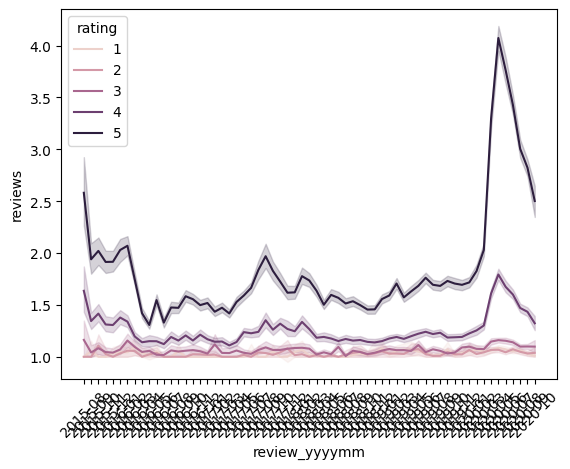

In [20]:
# Creo el gráfico de serie de tiempo
sns.lineplot(data=coursera_grouped_df, x='review_yyyymm', y='reviews', hue='rating')

# Roto a 45 grados las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45)

# Muestro el gráfico
plt.show()

Se mantiene en el tiempo una relación de mayor cantidad de reviews positivas que de negativas

## Intentaré entender qué ocurre con las reviews a nivel curso

In [21]:
coursera_reviews_curso_df = coursera_grouped_df.groupby(['course_id', 'name',\
                                                         'rating'])\
                                            .aggregate({'date_reviews' : ['min', 'max']})
coursera_reviews_curso_df.reset_index(inplace=True)
coursera_reviews_curso_df.columns = coursera_reviews_curso_df.columns.to_flat_index()
coursera_reviews_curso_df.columns = ['_'.join(col) for col in coursera_reviews_curso_df.columns.values]

In [22]:
coursera_reviews_curso_df['course_life_span'] = coursera_reviews_curso_df['date_reviews_max'] - coursera_reviews_curso_df['date_reviews_min']
coursera_reviews_curso_df['course_life_span'] = coursera_reviews_curso_df['course_life_span'].dt.days

In [23]:
coursera_reviews_curso_df.head()

,course_id_,name_,rating_,date_reviews_min,date_reviews_max,course_life_span
0,aboriginal-education,Aboriginal Worldviews and Education,1,2020-05-22,2020-05-22,0
1,aboriginal-education,Aboriginal Worldviews and Education,2,2019-05-07,2020-06-03,393
2,aboriginal-education,Aboriginal Worldviews and Education,3,2017-05-16,2017-07-01,46
3,aboriginal-education,Aboriginal Worldviews and Education,4,2017-04-12,2020-07-24,1199
4,aboriginal-education,Aboriginal Worldviews and Education,5,2017-03-22,2020-10-08,1296


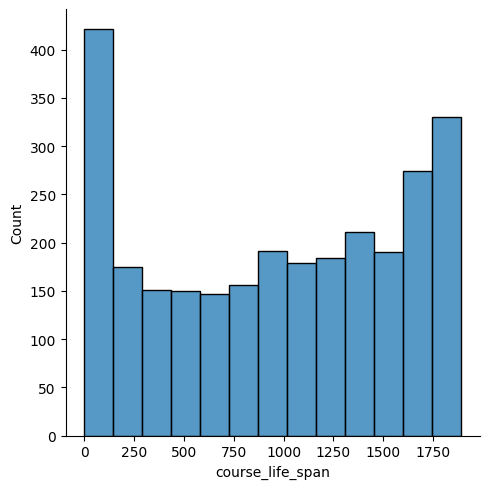

In [30]:
sns.displot(coursera_reviews_curso_df, x='course_life_span')

La mayoría de los cursos reciben reviews por solo un día, mientras que el resto de los cursos recibe reviews por un año o más. `Muchos cursos reciben reviews por hasta cinco años!`

## Analizo la relación entre el valor promedio de las reviews y el plazo de vida del curso

Plazo de vida medido como la diferencia entre la fecha de la ultima review y la de la primera review.

In [25]:
life_span_and_rating_df = coursera_reviews_curso_df.groupby('course_life_span', as_index=False).mean('rating')

In [27]:
life_span_and_rating_df.sort_values('rating_')

,course_life_span,rating_
612,888,1.0
348,485,1.0
347,483,1.0
956,1383,1.0
963,1394,1.0
...,...,...
479,692,5.0
480,693,5.0
381,541,5.0
484,700,5.0


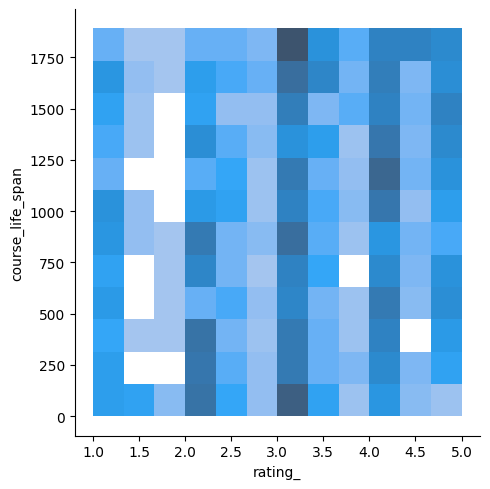

In [29]:
sns.displot(life_span_and_rating_df, x='rating_', y='course_life_span')

- El cuadrante superior derecho es más denso que el resto de los cuadrantes, lo que indica que a mayor valor de rating promedio, mayor es también la probabilidad de que el curso tenga mayor adopción en el tiempo.